# Notes

Probability distributions are some probability models that can predict the probability of an event occurs.

There are two types of distribution, discrete or continuous. For discrete, the input of the model should be an integer while any decimal numbers for continuous. We usually consider the probability mass function (PMF), probility density function (PDF), cumulative distribution function (CDF), mean and variance of the distributions.

PMF and PDF are similar functions that compute the probability of the event "$X = k$", where $X$ is a discrete and continuous random variable respectively.

CDF is a function that compute the probability of the event "$X \leq k$". This time for discrete and continuous random variable $X$, we use the same notation "CDF". In mathematics, summation of PMF and integrating of PDF is the cumputation method of finding the CDF of the distribution.

Mean and variance of the distributions are often parametrized by the parameters in the distribution. We will mention in each case.

We list out some important and commonly used properties of PMF/PDF and CDF.
* summation of PMF from $-\infty$ to x / integrating PDF from $-\infty$ to x = CDF($X = x$)
* summation of PMF from $-\infty$ to $+\infty$ = 1 / integrating PDF from $-\infty$ to $+\infty$ = 1
* Derivative of CDF = PMF/PDF, CDF is equal to the antiderivative of PDF

The following are some selected commonly used distributions.

### 1. Normal Distribution

Normal distribution is a probability distribution of a continuous random variable $X$. The PDF is
$$P(X = x) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp[-\frac{(x-\mu)^2}{2}],$$
where $\mu$ and $\sigma^2$ is the mean and variance of the distribution. We may generates some random numbers obeying the normal distribution with mean $\mu$ and standard deviation $\sigma$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
mu, sigma = 0, 1

In [ ]:
s = np.random.normal(0, 1, 1000)

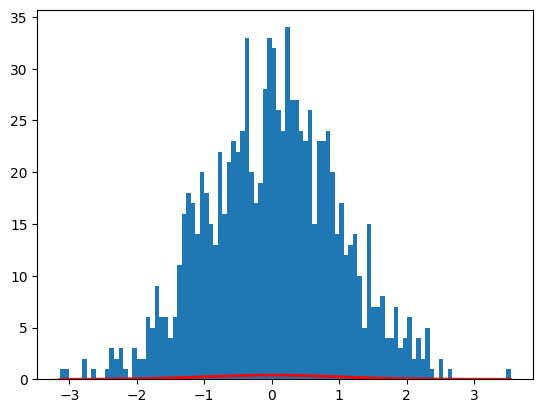

In [ ]:
count, bins, ignored = plt.hist(s, 100)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

We may find the value of $x$ such that $P(X = x) = k$, where $k$ is a certain constant. The computation is using the PDF of the distribution. We may also compute the probability of generating a random value in the distribution such that it is less than or greater than a certain constant $k$. The computation is using the CDF of the distribution.

In [ ]:
stats.norm.ppf(0.025)    # P(X = -1.96) = 0.025

np.float64(-1.9599639845400545)

In [ ]:
stats.norm.ppf(0.975)    # P(X = 1.96) = 0.975

np.float64(1.959963984540054)

In [ ]:
stats.norm.cdf(3)        # CDF(3) = P(X <= 3) = 0.9987

np.float64(0.9986501019683699)

In [ ]:
stats.norm.cdf(-1)       # CDF(-1) = P(X <= -1) = 0.1587

np.float64(0.15865525393145707)

### 2. Binomial Distribution

Binomial distribution is a probability distribution of a discrete random variable $X$. The PMF of a binomial process repeated $n$ times and "success" $k$ times is
$$P(X = k) = C^n_k p^k(1-p)^{n-k},$$
where $p$ is the probaility of getting a "success".

```Example```

Suppose we are throwing a fair die 10000 times. We define "success" by throwing a "6", other outputs are not "success".

In [ ]:
stats.binom.rvs(10000, 1/6)     # n = 10000, p = 1/6 => output = number of "success"

1688

In [ ]:
# The following code computes the probability of getting less than or equal to k success.
# k = 1700, n = 10000, p = 1/6
stats.binom.cdf(1700, 10000, 1/6)

np.float64(0.8181599699159081)

In [ ]:
# The following code computes the probability of getting exactly k success in n trials.
# k = 1500, n = 10000, p = 1/6
stats.binom.pmf(1500, 10000, 1/6)

np.float64(3.827419560102069e-07)

In [ ]:
# Generate 10000 binomial sample with n = 10000 and p = 1/6
b = stats.binom.rvs(10000, 1/6, size = 10000)

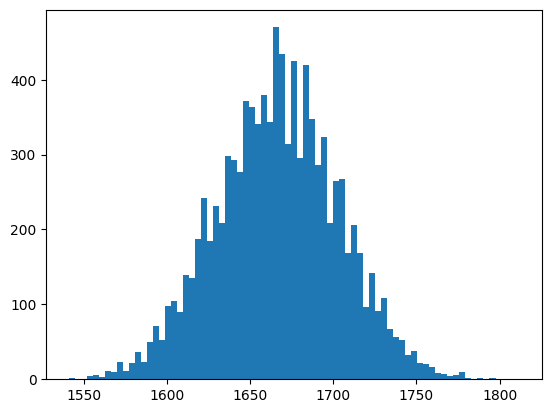

In [ ]:
count, bins, ignored = plt.hist(b, 75)

### 3. Poisson Distribution

Poisson distribution is a probability distribution of a discrete random variable $X$. It models the number of success within a certain time interval. Suppose the event happens/we get "success" for an average $\lambda$ times in a given time interval. Then the PMF is
$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!},$$
which is also the formula of computing the probability of getting $x$ success in the certain time interval.

```Example```

Suppose a call center which receives an average of $\lambda = 3$ calls per minute at all times of day. We assume the calls are independent, receiving one does not change the probability of when the next one will arrive. Under these assumptions, the number $k$ of calls received during any minute has a Poisson probability distribution.

In [ ]:
# Probability of receiving 1 call at a certain minute
stats.poisson.pmf(1, 3)

np.float64(0.14936120510359185)

In [ ]:
sum = 0

In [ ]:
for i in range(1, 5):
    sum = stats.poisson.pmf(i, 3) + sum

In [ ]:
sum    # P(X = 1) + P(X = 2) + P(X = 3) + P(X = 4)

np.float64(0.7654761761559081)

In [ ]:
1-sum  # P(X = 0) + P(X >= 5)

np.float64(0.23452382384409187)

# Exercise

1. On average, two new accounts are opened per day at one bank branch.

(a). Find the probability that on a given day, the number of accounts will be opened is at least 3.

(b). Find the probability that in a given week (5 days in total), the number of accounts that will be opened is exactly 10.

(c). Now the manager expects that 2 or more accounts will be opened everyday
in the next week (5 days in total). Let $X$ denote the number of days when the manager’s
expectation can be met. Compute the probability that $X$ is less than 3.

2. Mary goes to school by bus. On any school day, she takes, with probabilities 0.6, 0.3 and 0.1, one of the three bus routes $R_1$, $R_2$ and $R_3$ respectively. Past experience reveals that, on any given day, the probabilities that Mary arrives at school late by taking routes $R_1$, $R_2$ and $R_3$ are 0.05, 0.2 and 0.3 respectively.

(a). Mary arrived at school late on a certain day. What is the probability that she took $R_3$ on that day?

(b). There are 20 school days in April. Find the probability that Mary will arrive at school late on at most two days in April.

3. By algebraic calculations, we know that the theoretical expected value of throwing a fair die is 3.5. Using Python to simulate throwing 10000 times of a fair die, then compute the estimated expected value of the outcome. (should be close to 3.5)